In [1]:
import sys
sys.path.append('../')
sys.path.append('../utils/')
import schema
import importlib
import datajoint_utils as dju

import database_pop as pop
import numpy as np

importlib.reload(pop)
importlib.reload(dju)
# pop.reload_celltypefiles()

import stim
importlib.reload(stim)

[2025-06-25 16:55:22,717][INFO]: Connecting root@127.0.0.1:3306
[2025-06-25 16:55:22,806][INFO]: Connected root@127.0.0.1:3306


/Users/riekelabbackup/Desktop/Vyom/RetinAnalysis
/Users/riekelabbackup/Desktop/Vyom/RetinAnalysis/utils/config.ini


<module 'stim' from '/Users/riekelabbackup/Desktop/Vyom/RetinAnalysis/nbs/../stim.py'>

In [2]:
import settings
settings.mea_config

/Users/riekelabbackup/Desktop/Vyom/RetinAnalysis
/Users/riekelabbackup/Desktop/Vyom/RetinAnalysis/utils/config.ini


{'data': '/Volumes/data-1/data/sorted',
 'analysis': '/Volumes/data-1/analysis',
 'h5': '/Volumes/data-1/data/h5',
 'meta': '/Volumes/data-1/datajoint_testbed/mea/meta',
 'tags': '/Volumes/data-1/datajoint_testbed/mea/tags',
 'user': 'drezeanu'}

In [60]:
protocol_names = dju.search_protocol('dsos')
df = dju.get_datasets_from_protocol_names(protocol_names)
df.tail()

Found 1 protocols matching "dsos":
['manookinlab.protocols.GratingDSOS']
Found 56 experiments, 80 epoch blocks.


,exp_name,datafile_name,NDF,chunk_name,protocol_name,is_mea,data_dir,group_label,experiment_id,protocol_id,group_id,block_id,chunk_id
75,20250131C,data014,0.0,motion2,manookinlab.protocols.GratingDSOS,1,20250131C/data014,gratingDSOS,117,12,2140,3240,405
76,20250131C,data015,0.0,motion2,manookinlab.protocols.GratingDSOS,1,20250131C/data015,gratingDSOS,117,12,2140,3241,405
77,20250307C,data021,0.0,shane,manookinlab.protocols.GratingDSOS,1,20250307C/data021,Shane Grating,124,12,2250,3392,466
78,20250307C,data022,0.0,shane,manookinlab.protocols.GratingDSOS,1,20250307C/data022,Shane Grating Try 2,124,12,2251,3393,466
79,20250307C,data034,0.0,grating_ds,manookinlab.protocols.GratingDSOS,1,20250307C/data034,GratingDSOS,124,12,2260,3404,458


In [73]:
importlib.reload(stim)
# idxs = [105, 106]
idxs = [79]
sg = stim.make_stim_group(df.loc[idxs, 'exp_name'], df.loc[idxs, 'datafile_name'])

In [74]:
import response
importlib.reload(response)
r1 = response.ResponseBlock(sg.ls_blocks[0].exp_name, sg.ls_blocks[0].datafile_name)

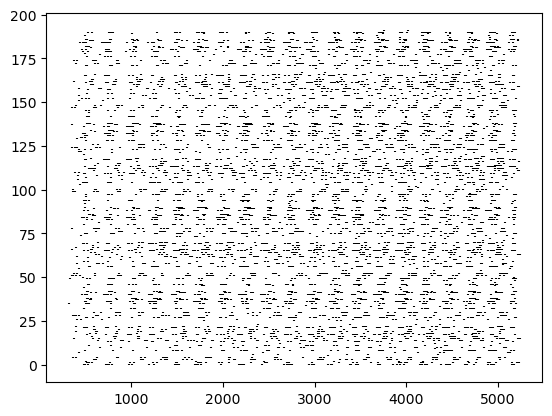

In [85]:
import matplotlib.pyplot as plt
sts = r1.df_spike_times.iloc[9,0]
for i in range(r1.n_epochs):
    plt.eventplot(sts[i], lineoffsets=i, linelengths=0.5, colors='black')

In [86]:
import symphony_data as sd
c_data = sd.Dataset(r1.exp_name)

In [87]:
t_out = c_data.get_spike_times_and_parameters('GratingDSOS', file_name=r1.datafile_name,
sort_algorithm=r1.ss_version)

Processing group 1 of 1 and block 1 of 1


Processing epochs in block file data034: 100%|██████████| 192/192 [00:03<00:00, 48.95it/s]


In [89]:
t_out[0].shape, r1.n_epochs

((691, 192), 192)

In [108]:
sts2[0] - sts[0]

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [5]:
import pandas as pd
str_file = '/Volumes/data-1/analysis/20250307C/chunk1/kilosort2.5/dragos_kilosort2.5.classification.txt'
pd.read_csv(str_file, sep='  ', index_col=None, header=None).head()

/var/folders/pt/ln41qs8d7vd36z1sgbgljbn00000gn/T/ipykernel_23743/3340038211.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  pd.read_csv(str_file, sep='  ', index_col=None, header=None).head()


,0,1
0,1,All/OffP/nc40/
1,18,All/OffP/nc40/
2,25,All/OffP/nc40/
3,29,All/OffP/nc40/
4,47,All/OffP/nc40/


In [106]:
sts[0].shape

(175,)

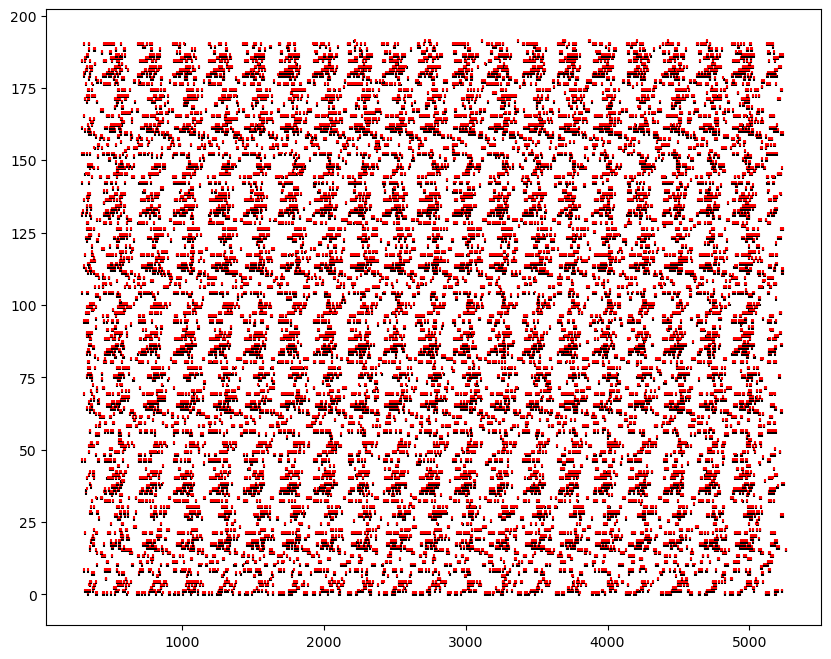

In [103]:
i_cell = 3
sts = t_out[0][i_cell]
sts2 = r1.df_spike_times.iloc[i_cell,0]
plt.figure(figsize=(10, 8))
for i in range(r1.n_epochs):
    plt.eventplot(sts[i], lineoffsets=i, linelengths=1, colors='black')
    plt.eventplot(sts2[i], lineoffsets=i+0.5, linelengths=1, colors='red')

In [93]:
(schema.EpochBlock() & f'parent_id=1')

id,h5_uuid,data_dir only for MEA,experiment_id,parent_id,protocol_id,chunk_id,label,properties,attributes,start_time,end_time,parameters,array_pitch
1,8d63387f-7099-460e-b834-e26c77db7ae3,20230406C/data041,1,1,5,None,None,=BLOB=,=BLOB=,2023-04-06 15:38:41,2023-04-06 15:39:53,=BLOB=,30um


In [96]:
(schema.EpochBlock() & f'id=1').fetch(format='frame').at[1,'properties']

{'ndf': 'null',
 'maxRod': 1.2843392419444672e+18,
 'array_id': 1501,
 'maxLCone': 6.869392757466885e+17,
 'maxMCone': 6.157932047673871e+17,
 'maxSCone': 1.0323500178438186e+17,
 'epochEnds': [457492, 887900, 1318308],
 'n_samples': 1400000,
 'stageClass': 'Video',
 'epochStarts': [47512, 477920, 908328],
 'dataFileName': '20230406C\\data041.bin',
 'frameTimesMs': [[0,
   16,
   33,
   49,
   66,
   83,
   99,
   116,
   132,
   149,
   166,
   182,
   199,
   215,
   232,
   248,
   265,
   282,
   298,
   315,
   331,
   348,
   365,
   381,
   398,
   414,
   431,
   447,
   464,
   481,
   497,
   514,
   530,
   547,
   564,
   580,
   597,
   613,
   630,
   646,
   663,
   679,
   696,
   713,
   729,
   746,
   762,
   779,
   796,
   812,
   829,
   845,
   862,
   878,
   895,
   912,
   928,
   945,
   961,
   978,
   995,
   1011,
   1028,
   1044,
   1061,
   1077,
   1094,
   1111,
   1127,
   1144,
   1160,
   1177,
   1194,
   1210,
   1227,
   1243,
   1260,
   1276,


In [71]:
sg.df_epochs

,spaceConstant,seed,exp_name,datafile_name,group_label,protocol_name,epoch_parameters,data_dir,experiment_id,group_id,block_id,protocol_id,epoch_id
epoch_index,,,,,,,,,,,,,
0,50,2105003033,20250307C,data030,OMS Dots,manookinlab.protocols.ObjectMotionDots,"{'NDF': 0, 'amp': 'Amp1', 'amp2': '(None)', 'g...",20250307C/data030,124,2258,3401,13,234920
1,100,2105007949,20250307C,data030,OMS Dots,manookinlab.protocols.ObjectMotionDots,"{'NDF': 0, 'amp': 'Amp1', 'amp2': '(None)', 'g...",20250307C/data030,124,2258,3401,13,234921
2,200,2105012799,20250307C,data030,OMS Dots,manookinlab.protocols.ObjectMotionDots,"{'NDF': 0, 'amp': 'Amp1', 'amp2': '(None)', 'g...",20250307C/data030,124,2258,3401,13,234922
3,300,2105017654,20250307C,data030,OMS Dots,manookinlab.protocols.ObjectMotionDots,"{'NDF': 0, 'amp': 'Amp1', 'amp2': '(None)', 'g...",20250307C/data030,124,2258,3401,13,234923
4,400,2105022504,20250307C,data030,OMS Dots,manookinlab.protocols.ObjectMotionDots,"{'NDF': 0, 'amp': 'Amp1', 'amp2': '(None)', 'g...",20250307C/data030,124,2258,3401,13,234924
5,500,2105027360,20250307C,data030,OMS Dots,manookinlab.protocols.ObjectMotionDots,"{'NDF': 0, 'amp': 'Amp1', 'amp2': '(None)', 'g...",20250307C/data030,124,2258,3401,13,234925
6,750,2105032210,20250307C,data030,OMS Dots,manookinlab.protocols.ObjectMotionDots,"{'NDF': 0, 'amp': 'Amp1', 'amp2': '(None)', 'g...",20250307C/data030,124,2258,3401,13,234926
7,1000,2105037088,20250307C,data030,OMS Dots,manookinlab.protocols.ObjectMotionDots,"{'NDF': 0, 'amp': 'Amp1', 'amp2': '(None)', 'g...",20250307C/data030,124,2258,3401,13,234927
8,50,2105041986,20250307C,data030,OMS Dots,manookinlab.protocols.ObjectMotionDots,"{'NDF': 0, 'amp': 'Amp1', 'amp2': '(None)', 'g...",20250307C/data030,124,2258,3401,13,234928


In [85]:
df = dju.get_mea_exp_summary('20230523C')
df[df['datafile_name']=='data026']

,exp_name,datafile_name,group_label,NDF,chunk_name,protocol_name,duration_minutes,minutes_since_start,start_time,end_time,data_dir,experiment_id,group_id,block_id,chunk_id,protocol_id
26,20230523C,data026,Flashed spatial noise,0.0,chunk5,manookinlab.protocols.FlashedSpatialNoise,20.6,487.5,2023-05-23 19:44:45,2023-05-23 20:05:21,20230523C/data026,54,1187,1886,162,14


In [89]:
df_e = (schema.Epoch() & 'parent_id=1886').fetch(format='frame').reset_index()
df_e.at[0,'parameters']

{'NDF': 0,
 'amp': 'Amp1',
 'amp2': '(None)',
 'ndfs': '[]',
 'seed': 1,
 'preTime': 200,
 'stimType': 'front',
 'tailTime': 200,
 'flashTime': 200,
 'imageName': '00152',
 'lightPath': 'below',
 'noPatches': 20,
 'noiseSeed': 748786897,
 'prerender': 0,
 'canvasSize': [800, 600],
 'sampleRate': 1000,
 'centerOffset': [0, 0],
 'dataFileName': '20230523C\\data026.bin',
 'noiseContrast': 0.5,
 'noiseFilterSD': 2,
 'occluderWidth': [0, 100, 200, 400],
 'patchContrast': 'all',
 'patchSampling': 'random',
 'currentStimSet': 'NaturalImageFlashLibrary_120117',
 'onlineAnalysis': 'none',
 'trueCanvasSize': [1600, 600],
 'currentImageSet': '/VHsubsample_20160105',
 'micronsPerPixel': 3.8,
 'numberOfAverages': 1000,
 'monitorRefreshRate': 60,
 'backgroundIntensity': 0.19940717249552456,
 'currentOccluderWidth': 0,
 'microdisplayBrightness': 'high',
 'microdisplayBrightnessValue': 25}

In [47]:
importlib.reload(stim)
importlib.reload(dju)
idx = 105
ls_const = ['exp_name', 'datafile_name']
s1 = stim.StimBlock(**df.loc[idx,ls_const].to_dict(), ls_params=['radius', 'canvasSize'])
s2 = stim.StimBlock(**df.loc[idx+1,ls_const].to_dict(), ls_params=['radius'])
s1, s2

(StimBlock with properties:
   exp_name: 20250307C
   datafile_name: data030
   chunk_name: oms_dots
   protocol_name: manookinlab.protocols.ObjectMotionDots
   noise_protocol_name: manookinlab.protocols.SpatialNoise
   parameter_names of length: 59
   df_epochs for 13 epochs,
 StimBlock with properties:
   exp_name: 20250307C
   datafile_name: data031
   chunk_name: oms_dots
   protocol_name: manookinlab.protocols.ObjectMotionDots
   noise_protocol_name: manookinlab.protocols.SpatialNoise
   parameter_names of length: 59
   df_epochs for 16 epochs)

In [39]:
s1 + s2 + s2

TypeError: unsupported operand type(s) for +: 'int' and 'StimBlock'

In [52]:
s1.d_block_summary

{'exp_name': '20250307C',
 'datafile_name': 'data030',
 'group_label': 'OMS Dots',
 'NDF': 0.0,
 'chunk_name': 'oms_dots',
 'protocol_name': 'manookinlab.protocols.ObjectMotionDots',
 'duration_minutes': 10.92,
 'minutes_since_start': 558.53,
 'start_time': Timestamp('2025-03-07 21:28:44'),
 'end_time': Timestamp('2025-03-07 21:39:39'),
 'data_dir': '20250307C/data030',
 'experiment_id': 124,
 'group_id': 2258,
 'block_id': 3401,
 'chunk_id': 456,
 'protocol_id': 13}

In [48]:
s1.df_epochs.head()

,canvasSize,spaceConstant,seed,radius,exp_name,datafile_name,group_label,protocol_name,epoch_parameters,data_dir,experiment_id,group_id,block_id,protocol_id,epoch_id
epoch_index,,,,,,,,,,,,,,,
0,"[1824, 1140]",50,2105003033,75,20250307C,data030,OMS Dots,manookinlab.protocols.ObjectMotionDots,"{'NDF': 0, 'amp': 'Amp1', 'amp2': '(None)', 'g...",20250307C/data030,124,2258,3401,13,234920
1,"[1824, 1140]",100,2105007949,75,20250307C,data030,OMS Dots,manookinlab.protocols.ObjectMotionDots,"{'NDF': 0, 'amp': 'Amp1', 'amp2': '(None)', 'g...",20250307C/data030,124,2258,3401,13,234921
2,"[1824, 1140]",200,2105012799,75,20250307C,data030,OMS Dots,manookinlab.protocols.ObjectMotionDots,"{'NDF': 0, 'amp': 'Amp1', 'amp2': '(None)', 'g...",20250307C/data030,124,2258,3401,13,234922
3,"[1824, 1140]",300,2105017654,75,20250307C,data030,OMS Dots,manookinlab.protocols.ObjectMotionDots,"{'NDF': 0, 'amp': 'Amp1', 'amp2': '(None)', 'g...",20250307C/data030,124,2258,3401,13,234923
4,"[1824, 1140]",400,2105022504,75,20250307C,data030,OMS Dots,manookinlab.protocols.ObjectMotionDots,"{'NDF': 0, 'amp': 'Amp1', 'amp2': '(None)', 'g...",20250307C/data030,124,2258,3401,13,234924


In [51]:
np.unique(s1.df_epochs['canvasSize'].values)

array([list([1824, 1140])], dtype=object)

In [49]:
df_e.at[20,'epoch_parameters']

{'NDF': 0,
 'amp': 'Amp1',
 'ndfs': '[]',
 'alpha': 1,
 'speed': 700,
 'barSize': [200, 8000],
 'preTime': 500,
 'barColor': 'gray',
 'contrast': -1,
 'stimTime': 8000,
 'tailTime': 500,
 'contrasts': [-1, 1],
 'frameRate': 59,
 'lightPath': 'below',
 'lpfCutoff': 10000,
 'prerender': 0,
 'appVersion': None,
 'canvasSize': [1824, 1140],
 'dspVersion': None,
 'sampleRate': 1000,
 'orientation': 150,
 'randomOrder': 1,
 'scaleFactor': 0.5,
 'centerOffset': [0, 0],
 'dataFileName': '20241121H\\data001.bin',
 'hardwareType': 'MCTG_HW_TYPE_MC700B',
 'orientations': [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330],
 'serialNumber': None,
 'operatingMode': 'VClamp',
 'onlineAnalysis': 'none',
 'rawScaleFactor': 10,
 'secondaryAlpha': 1,
 'trueCanvasSize': [912, 1140],
 'backgroundColor': 'gray',
 'firmwareVersion': None,
 'innerMaskRadius': 0,
 'micronsPerPixel': 3.24,
 'outerMaskRadius': 0,
 'rawOutputSignal': 'AXMCD_OUT_SEC_VC_GLDR_V_CMD_MEMBx10',
 'numberOfAverages': 96,
 'scaleFact

In [52]:
test = df_e['epoch_parameters'].apply(lambda x: x.get('appVersion')).values
# len(np.unique(test))
test

array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, No

In [68]:
import os
def find_varying_epoch_parameters(df):
    # df should have epoch data for a SINGLE EpochBlock.
    # Thus assuming that all epoch parameter dictionaries have the same keys.
    # The epoch_parameters column has dictionaries of {parameter_name: value}
    # We want to find which parameters vary across epochs in the dataframe
    varying_params = set()
    param_names = df.at[0, 'epoch_parameters'].keys()
    for key in param_names:
        # Get all values across all epochs
        values = df['epoch_parameters'].apply(lambda x: x.get(key)).values
        # Check if all None
        if all(value is None for value in values):
            continue
        if len(np.unique(values)) > 1:
            varying_params.add(key)
    return list(varying_params)

def add_parameters_col(df, ls_params, src_col: str='epoch_parameters'):
    # Add a column to the dataframe that contains the values of the specified parameters
    # src_col should have dictionaries of {parameter_name: value}
    for param in ls_params:
        df[param] = df[src_col].apply(lambda x: x.get(param))
    return df


def get_mea_epoch_data_from_exp(exp_name: str, datafile_name: str, ls_params: list=None):
    # Filter Experiment by exp_name, EpochBlock by datafile_name, then join down to Epoch
    ex_q = schema.Experiment() & f'exp_name="{exp_name}"'
    eg_q = schema.EpochGroup() * ex_q.proj('exp_name', experiment_id='id')
    eg_q = eg_q.proj('exp_name', group_label='label', group_id='id')
    eb_q = eg_q * schema.EpochBlock.proj('protocol_id', 'data_dir', group_id='parent_id', block_id='id')
    data_dir = os.path.join(exp_name, datafile_name)
    eb_q = eb_q & f'data_dir="{data_dir}"'
    p_q = eb_q * schema.Protocol.proj(protocol_name='name')
    e_q = p_q * schema.Epoch.proj(epoch_parameters='parameters', block_id='parent_id', epoch_id='id')
    df = e_q.fetch(format='frame').reset_index()
    df['datafile_name'] = df['data_dir'].apply(lambda x: os.path.split(x)[-1])

    varying_params = find_varying_epoch_parameters(df)
    # Add ls_params to varying_params if provided
    if ls_params is not None:
        varying_params = list(set(varying_params).union(set(ls_params)))
    df = add_parameters_col(df, varying_params, 'epoch_parameters')
    ls_order = ['exp_name', 'datafile_name', 'group_label', 'protocol_name',
        'epoch_parameters'] + varying_params + ['data_dir', 'experiment_id', 'group_id', 'block_id', 'protocol_id', 'epoch_id']
    df = df[ls_order]

    return df
df_e = get_mea_epoch_data_from_exp(exp_name=s1.exp_name, datafile_name=s1.datafile_name, ls_params=['radius'])

In [69]:
df_e.head()

,exp_name,datafile_name,group_label,protocol_name,epoch_parameters,spaceConstant,seed,radius,data_dir,experiment_id,group_id,block_id,protocol_id,epoch_id
0,20241121H,data010,OMS dots,manookinlab.protocols.ObjectMotionDots,"{'NDF': 0, 'amp': 'Amp1', 'amp2': '(None)', 'n...",50,1187645452,75,20241121H/data010,110,2033,2979,13,222088
1,20241121H,data010,OMS dots,manookinlab.protocols.ObjectMotionDots,"{'NDF': 0, 'amp': 'Amp1', 'amp2': '(None)', 'n...",100,1187649919,75,20241121H/data010,110,2033,2979,13,222089
2,20241121H,data010,OMS dots,manookinlab.protocols.ObjectMotionDots,"{'NDF': 0, 'amp': 'Amp1', 'amp2': '(None)', 'n...",200,1187654353,75,20241121H/data010,110,2033,2979,13,222090
3,20241121H,data010,OMS dots,manookinlab.protocols.ObjectMotionDots,"{'NDF': 0, 'amp': 'Amp1', 'amp2': '(None)', 'n...",300,1187658902,75,20241121H/data010,110,2033,2979,13,222091
4,20241121H,data010,OMS dots,manookinlab.protocols.ObjectMotionDots,"{'NDF': 0, 'amp': 'Amp1', 'amp2': '(None)', 'n...",400,1187663506,75,20241121H/data010,110,2033,2979,13,222092


In [ ]:
df_typing = dju.get_typing_files_for_protocol(s1.exp_name, s1.datafile_name, s1.noise_protocol_name, True)
df_typing

Found 3 noise chunks for protocol "manookinlab.protocols.SpatialNoise"
Noise chunks sorted by distance:
  chunk2: 225.08 minutes
  chunk3: 25.07 minutes
  chunk1: 135.37 minutes
Found 4 cell typing file(s) for chunk2
Found 4 cell typing file(s) for chunk2
Found 4 cell typing file(s) for chunk2


,exp_name,datafile_name,datafile_names,chunk_name,protocol_name,ss_version,typing_file_name,typing_file_path,typing_file_id
0,20241121H,data007,[data007],chunk2,manookinlab.protocols.SpatialNoise,kilosort4,kilosort4.classification.txt,/Volumes/data-1/analysis/20241121H/chunk2/kilo...,457
1,20241121H,data007,[data007],chunk2,manookinlab.protocols.SpatialNoise,kilosort4,kilosort4.classification-FMR.txt,/Volumes/data-1/analysis/20241121H/chunk2/kilo...,458
2,20241121H,data007,[data007],chunk2,manookinlab.protocols.SpatialNoise,kilosort4,kilosort4.classification.txt,/Volumes/data-1/analysis/20241121H/chunk2/kilo...,459
3,20241121H,data007,[data007],chunk2,manookinlab.protocols.SpatialNoise,kilosort4,kilosort4.classification-FMR.txt,/Volumes/data-1/analysis/20241121H/chunk2/kilo...,460


In [72]:
df_sct = (schema.SortedCellType() & f'file_id=457').fetch(format='frame')
df_sct[df_sct['cell_type'].str.lower().str.contains('offp')]

,sorted_cell_id,file_id,cell_type
id,,,
307535,525295,457,All/OffP/
307536,525313,457,All/OffP/
307537,525331,457,All/OffP/
307538,525358,457,All/OffP/
307539,525369,457,All/OffP/
307540,525388,457,All/OffP/
307541,525406,457,All/OffP/
307542,525431,457,All/OffP/
307543,525445,457,All/OffP/


In [73]:
schema.SortedCell()

id,chunk_id,algorithm should be directory name,cluster_id
1,1,kilosort2,1
2,1,kilosort2,2
3,1,kilosort2,3
4,1,kilosort2,4
5,1,kilosort2,5
6,1,kilosort2,6
7,1,kilosort2,7
8,1,kilosort2,8
9,1,kilosort2,9
10,1,kilosort2,10


In [68]:
df_sct['cell_type'].unique()

array(['All/Amacrine/A1/', 'All/Amacrine/', 'All/'], dtype=object)

In [8]:
importlib.reload(stim)
ls_const = ['exp_name', 'datafile_name', 'ss_version']
idx = 0
n1 = stim.NoiseStim(**df_typing.loc[idx,ls_const].to_dict())
n1

NoiseStim with properties:
  exp_name: 20230614C
  datafile_name: data012
  chunk_name: chunk2
  protocol_name: manookinlab.protocols.FastNoise
  noise_protocol_name: manookinlab.protocols.FastNoise
  ss_version: kilosort2
  staXChecks: 100
  staYChecks: 75
  numXChecks: 100
  numYChecks: 75
  microns_per_pixel: 3.8
  canvas_size: [800, 600]
  data_files: ['data012']

In [28]:
import response
importlib.reload(response)
from utils import vision_utils as vu
importlib.reload(vu)
r1 = response.NoiseResponse(n1)

Loading VCD from /Volumes/data-1/analysis/20230614C/chunk2/kilosort2 for kilosort2...


In [29]:
r1.vcd.main_datatable[1].keys()

dict_keys(['ID', 'classID', 'x0', 'y0', 'SigmaX', 'SigmaY', 'Theta', 'gAmp', 'contourX', 'contourY', 'contourArea', 'simpleContourX', 'simpleContourY', 'simpleContourArea', 'RedTimeCourse', 'GreenTimeCourse', 'BlueTimeCourse', 't1', 't2', 't3', 'a1', 'a2', 'a3', 'n1', 'n2', 'n3', 'tOffset', 'dot', 'dot2', 'srm', 'rl', 'amp1', 'amp2', 'amp3', 'blueness', 'RedVTimeCourse', 'GreenVTimeCourse', 'BlueVTimeCourse', 't1V', 't2V', 't3V', 'a1V', 'a2V', 'a3V', 'n1V', 'n2V', 'n3V', 'tVOffset', 'dotV', 'dot2V', 'srmV', 'rlV', 'amp1V', 'amp2V', 'amp3V', 'bluenessV', 'Auto', 'isiBinning', 'nSpikes', 'isiMean', 'isiRMS'])

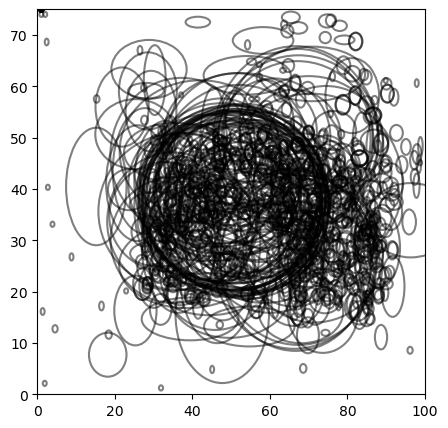

In [31]:
r1.plot_rf_ells()

In [ ]:
importlib.reload(dju)
protocol_names = dju.search_protocol('spatialnoise')
df = dju.get_datasets_from_protocol_names(protocol_names)
df.head()

Found 4 protocols matching "spatialnoise":
['manookinlab.protocols.DisplacedSpatialNoise'
 'manookinlab.protocols.FlashedSpatialNoise'
 'manookinlab.protocols.SpatialNoise'
 'manookinlab.protocols.SpatialNoiseAndMotion']
No epochs found for block 2372
Found 48 experiments, 192 epoch blocks.


,exp_name,datafile_name,NDF,chunk_name,protocol_name,is_mea,data_dir,group_label,experiment_id,protocol_id,group_id,block_id,chunk_id
0,20231003C,data003,0.5,chunk1,manookinlab.protocols.SpatialNoise,1,20231003C/data003,noise,68,3,1499,2285,208
1,20231003C,data004,0.5,chunk1,manookinlab.protocols.SpatialNoise,1,20231003C/data004,noise,68,3,1499,2286,208
2,20231003C,data005,0.5,chunk1,manookinlab.protocols.SpatialNoise,1,20231003C/data005,noise,68,3,1499,2287,208
3,20231003C,data017,0.5,chunk3,manookinlab.protocols.SpatialNoise,1,20231003C/data017,spatial noise,68,3,1506,2296,206
4,20231003C,data027,0.5,chunk4,manookinlab.protocols.SpatialNoise,1,20231003C/data027,spatial noise,68,3,1516,2306,207


In [44]:
df[df['group_label'].str.contains('big')]

,exp_name,datafile_name,NDF,chunk_name,protocol_name,is_mea,data_dir,group_label,experiment_id,protocol_id,group_id,block_id,chunk_id
20,20231220C,data007,0.5,big_noise,manookinlab.protocols.SpatialNoise,1,20231220C/data007,big noise,73,3,1580,2380,228
25,20240117C,data009,0.5,big_noise,manookinlab.protocols.SpatialNoise,1,20240117C/data009,big noise,74,3,1607,2410,234
32,20240130C,data025,0.5,big_noise,manookinlab.protocols.SpatialNoise,1,20240130C/data025,big noise,75,3,1651,2456,240
33,20240130C,data026,0.5,big_noise,manookinlab.protocols.SpatialNoise,1,20240130C/data026,big noise,75,3,1651,2457,240
146,20250219H,data018,0.0,chunk3,manookinlab.protocols.SpatialNoise,1,20250219H/data018,big noise,120,3,2187,3301,426
147,20250219H,data019,0.0,chunk3,manookinlab.protocols.SpatialNoise,1,20250219H/data019,big noise,120,3,2187,3302,426
164,20250306C,data005,0.0,big_noise,manookinlab.protocols.SpatialNoise,1,20250306C/data005,big noise,127,3,2296,3487,477
